In [1]:
from ngsolve import *
from netgen.meshing import *
import math
import sys
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *
from ngsolve.webgui import Draw
from Models import CubeMesh
model=CubeMesh(mur=1000, msize=meshsize.coarse)
model.Print()
mesh=model.mesh
Draw(mesh)

coil=UNIF(0,0,1,0)

from A_ReducedA import A_ReducedA_Method
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method
feOrder=8

Model: Cube mur= 1000
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
name: iron   mass: 1.0000000000000002   center: (0.5, 0.5, 0.5)
name: A_domain   mass: 0.728   center: (0.737363, 0.737363, 0.737363)
name: Omega_domain   mass: 123.27199999999995   center: (2.52663, 2.52663, 2.52663)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 315370  Nonzeros= 111303072  symmetric matrix size= 55809221.0
shift parameter= 1.02
minimum residual= 9.488181961272888e-09  at iteraions:  268


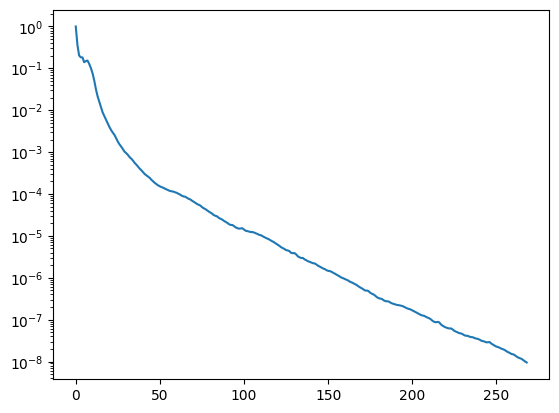

結果のノルム: 1.0291414165100009e-09
power=  14536479.02642378
feOrder= 8    ndof= 326111   
center magnetic field =  (1.2601636930633878e-11, -2.9647877868046543e-07, 3.446368332228351)   
magnetic energy= 11541.379446089919   
経過時間: 178.9255 秒  
**** B field ****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [2]:
A_ReducedA_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

enter iccg_solve
Dof= 135944  Nonzeros= 34965270  symmetric matrix size= 17550607.0
shift parameter= 1.01
minimum residual= 9.234648703853246e-09  at iteraions:  98


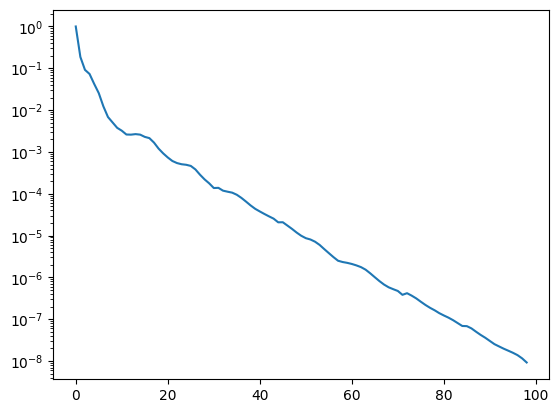

結果のノルム: 1.0313493202620822e-08
power=  13299232.880079469
feOrder= 8    ndof= 139929   
center magnetic field =  (1.5102343358934567e-11, -4.231033382380488e-12, 3.4476356299040027)   
magnetic energy= 11568.97631021465   
経過時間: 29.8350 秒  
**** B field ****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [3]:
Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

enter iccg_solve
Dof= 225059  Nonzeros= 71419621  symmetric matrix size= 35822340.0
shift parameter= 1.02
minimum residual= 7.435276405447754e-09  at iteraions:  406


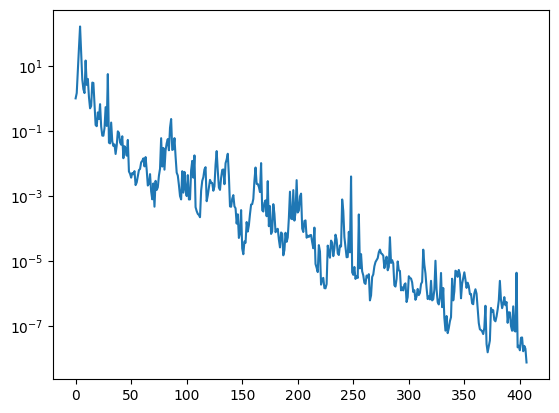

結果のノルム: 2.4230955201449803e-09
power=  4198732.203068063
feOrder= 8    ndof= 232730   
center magnetic field =  (0.0, -2.4790426680963306e-07, 3.4463682167354857)   
magnetic energy= 11541.379590852714   
経過時間: 136.2060 秒  
**** B field ****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [4]:
A_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

In [5]:
        """
        with TaskManager():
        a.Assemble()
        gf=GridFunction(fes)
        gf.vec.data += a.mat.Inverse(freedofs=fes.FreeDofs()) * f.vec
        """

'\nwith TaskManager():\na.Assemble()\ngf=GridFunction(fes)\ngf.vec.data += a.mat.Inverse(freedofs=fes.FreeDofs()) * f.vec\n'

In [6]:
        """
        a += 1e-8/mua*A*N*dx("iron")+1e-8/mu0*A*N*dx("A_domain")
        c = Preconditioner(a, "bddc")
        #c = Preconditioner(a, "local")
        with TaskManager():
            a.Assemble()
        gf = GridFunction(fes)
        solver = GMRESSolver(a.mat, pre=c.mat)
        with TaskManager():
            solvers.CG(sol=gf.vec, rhs=f.vec, mat=a.mat, pre=c.mat, printrates=True)
        """

'\na += 1e-8/mua*A*N*dx("iron")+1e-8/mu0*A*N*dx("A_domain")\nc = Preconditioner(a, "bddc")\n#c = Preconditioner(a, "local")\nwith TaskManager():\n    a.Assemble()\ngf = GridFunction(fes)\nsolver = GMRESSolver(a.mat, pre=c.mat)\nwith TaskManager():\n    solvers.CG(sol=gf.vec, rhs=f.vec, mat=a.mat, pre=c.mat, printrates=True)\n'

In [7]:
"""
print("nv=", mesh.nv, " nedge=", mesh.nedge, " nfacet=", mesh.nfacet, " ne=",mesh.ne)
print(mesh.GetMaterials())
for v in mesh.vertices:
    print( v.nr, v.point)
for ed in mesh.edges:
    print(ed, ed.vertices)
for el in mesh.Elements():
    print( el.nr, el.mat, el.vertices, el.edges, el.faces)

print("ndof=", fes.ndof)
print(fes.FreeDofs())
for el in mesh.Elements():
    print(fes.GetDofNrs(el))
"""

"""
print("ndof=", fesA.ndof)
print(fesA.FreeDofs())
for el in mesh.Elements():
    print(fesA.GetDofNrs(el))

print("ndof=", fesOmega.ndof)
print(fesOmega.FreeDofs())
for el in mesh.Elements():
    print(fesOmega.GetDofNrs(el))

from ngsolve.webgui import Draw
gf = GridFunction(fesA)
print("dof=", fesA.ndof)
for n in range(fesA.ndof):
    gf.vec.FV()[n]= 0
#print([m])
gf.vec.FV()[10]= 1
Draw (gf)
"""

'\nprint("ndof=", fesA.ndof)\nprint(fesA.FreeDofs())\nfor el in mesh.Elements():\n    print(fesA.GetDofNrs(el))\n\nprint("ndof=", fesOmega.ndof)\nprint(fesOmega.FreeDofs())\nfor el in mesh.Elements():\n    print(fesOmega.GetDofNrs(el))\n\nfrom ngsolve.webgui import Draw\ngf = GridFunction(fesA)\nprint("dof=", fesA.ndof)\nfor n in range(fesA.ndof):\n    gf.vec.FV()[n]= 0\n#print([m])\ngf.vec.FV()[10]= 1\nDraw (gf)\n'

meshsize.coarse

feOrder= 1   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 2535   
center magnetic field =  (0.0, 0.13648550675761853, 3.8822326063047488)   
magnetic energy= 12575.928132032475   
経過時間: 10.6726 秒  
enter iccg_solve
Dof= 1126  Nonzeros= 16010  symmetric matrix size= 8568.0
shift parameter= 1.0
minimum residual= 4.023818902577089e-13  at iteraions:  48

feOrder= 2   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 7058   
center magnetic field =  (0.0, -0.07448297716955096, 3.441529057512686)   
magnetic energy= 12129.622568449831   
経過時間: 4.1067 秒 
enter iccg_solve
Dof= 5279  Nonzeros= 135587  symmetric matrix size= 70433.0
shift parameter= 1.0
minimum residual= 1.0590739344522164e-12  at iteraions:  187

feOrder= 3   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 17235   
center magnetic field =  (0.0, -0.00577938933757507, 3.5583735344109964)   
magnetic energy= 12245.624515698084   
経過時間: 3.8810 秒 
enter iccg_solve
Dof= 14886  Nonzeros= 675891  symmetric matrix size= 345388.5
shift parameter= 1.0
minimum residual= 1.3969153168293444e-12  at iteraions:  277

feOrder= 6   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 104490   
center magnetic field =  (0.0, 7.769305790574445e-06, 3.566723363269401)   
magnetic energy= 12342.56448263178   
経過時間: 51.8855 秒  
enter iccg_solve
Dof= 99231  Nonzeros= 16638504  symmetric matrix size= 8368867.5
shift parameter= 1.0
minimum residual= 2.165483052807027e-12  at iteraions:  734

a.mat.Inverse
feOrder= 6   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 104490   
center magnetic field =  (0.0, 7.755773891963375e-06, 3.566723375220046)   
magnetic energy= 12342.564485475083   
経過時間: 18.8254 秒  
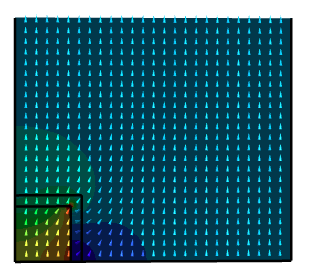

meshsize.fine

feOrder= 1   
enter iccg_solve
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 19005   
center magnetic field =  (0.0, 0.0, 3.5973786148289246)   
magnetic energy= 12179.921019624098   
経過時間: 1.8049 秒  
Dof= 8882  Nonzeros= 134846  symmetric matrix size= 71864.0
shift parameter= 1.06
minimum residual= 4.870886337406865e-13  at iteraions:  84

enter iccg_solve
feOrder= 5   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 520775   
center magnetic field =  (-1.0032272515336623e-39, 9.643647873364105e-40, 3.567305166599915)   
magnetic energy= 12360.950080273635   
経過時間: 79.0045 秒
 magnetic energy= 12360.950080273635   
経過時間: 79.0045 秒  
Dof= 497688  Nonzeros= 59831900  symmetric matrix size= 30164794.0
shift parameter= 1.06
minimum residual= 4.376304864760951e-12  at iteraions:  230

feOrder= 6   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 860260   
center magnetic field =  (1.6252957936518763e-40, -1.5623359812123905e-40, 3.567553236498278)   
magnetic energy= 12366.42875120857   
経過時間: 256.1622 秒 
enter iccg_solve
Dof= 831522  Nonzeros= 145658402  symmetric matrix size= 73244962.0
shift parameter= 1.06
minimum residual= 1.1119254036259493e-11  at iteraions:  422

"bddc"
feOrder= 1   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 19005   
center magnetic field =  (0.0, 0.0, 3.597378599442934)   
magnetic energy= 12179.920950620493   
経過時間: 3.1884 秒 
CG iteration 1, residual = 2071.2362470318703     
CG iteration 2, residual = 2.2422268129359974e-06     
CG iteration 3, residual = 8.870933401796136e-11   


a.mat.Inverse
feOrder= 1   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 19005   
center magnetic field =  (0.0, 0.0, 3.597378614826003)   
magnetic energy= 12179.921019622425   
経過時間: 3.2571 秒 

feOrder= 3   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 137542   
center magnetic field =  (-2.232454635139055e-37, 2.1459750382207594e-37, 3.5657416580228847)   
magnetic energy= 12326.599466477426   
経過時間: 10.1959 秒 

feOrder= 5   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 520775   
center magnetic field =  (-1.0032113462227169e-39, 9.64349498156632e-40, 3.5673051665833153)   
magnetic energy= 12360.950080271783   
経過時間: 174.2252 秒  

feOrder= 6
NgException: PardisoInverse: Setup and Factorization failed